# Data Analysis Project Submission
## Adi Srikanth, Fall 2021

## Importing Libraries & Reading Data

In [59]:
### SET UP ###
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

movie_data = pd.read_csv('movieReplicationSet.csv')
movie_data.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.000,NaN,3.000,NaN,NaN,NaN,NaN,NaN,...,1.000,6.000,2.000,5.000,5.000,5.000,1.000,1.000,0,1
1,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000,1.000,1.000,6.000,5.000,3.000,2.000,1.000,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000,4.000,3.000,5.000,5.000,4.000,4.000,1.000,1,0
3,NaN,NaN,2.000,NaN,3.000,NaN,NaN,NaN,NaN,4.000,...,3.000,1.000,1.000,4.000,5.000,3.000,1.000,1.000,0,1
4,NaN,NaN,3.500,NaN,0.500,NaN,0.500,1.000,NaN,0.000,...,2.000,3.000,2.000,5.000,6.000,4.000,4.000,1.000,1,1


## Introduction 

In this project, we employ several statistical significance tests. These tests are implemented using the scikit-learn package. Additionally, for the use of these tests, we assume independence between ratings in our given dataset. 

## Problem One: Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

#### The Short Answer
Yes, it appears that more popular movies are rated higher than less popular movies. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I split the dataset into "high popularity" movies and "low popularity" movies. To do this, I first got the median number of ratings for a all movies; if a movie had more ratings than the median number of ratings, I deemed it of high popularity. If a movie had fewer ratings than the median number of ratings, I designated it as low popularity. If it was on the median, I did not include it in my dataset. 

Next, I generated the median rating for each movie in my two datasets. I then combined those medians into lists that I could feed into a significance test. In short, I was comparing the median ratings of high popularity movies to the median ratings of low popularity movies.   

#### Test Used: Mann Whitney U Test
I used a one-tailed Mann Whitney U Test in order to compare the list of medians for high popularity movies against the list of medians for low populairty movies. I used the following structure: 

- Null Hypothesis: There is no difference between ratings of high popularity and low popularity movies 
- Alternative Hypothesis: Ratings of high popularity movies are higher than those of low popularity movies

#### Result
The p-value generated from my data was 9.929258851707232e-35, which is lower than the specified threshhold of 0.005. Therefore, we reject the null hypothesis that the ratings of high and low popularity movies are the same. Instead, we lend credence to the idea that ratings of high popularity movies and higher than those of low popularity movies. 

#### 


In [61]:
### PROBLEM ONE ###
# Subset Data Frame to just movies and their user ratings
movie_titles = movie_data.iloc[:,:400]
movie_titles.head()

# Get the median number of ratings for a movie
median_ratings_total = np.median(movie_titles.count().values)

# Get the number of ratings for each movie
movie_titles_numratings = movie_titles.count().to_frame().reset_index()
movie_titles_numratings.columns = ['Movie_Title', 'Num_Ratings']

# Determine hig and low popular movies 
high_popular_movies = list(movie_titles_numratings[movie_titles_numratings.Num_Ratings > median_ratings_total]['Movie_Title'])
low_popular_movies = list(movie_titles_numratings[movie_titles_numratings.Num_Ratings < median_ratings_total]['Movie_Title'])

# Subset data to high and low popular movies
high_popular_movie_titles = movie_titles.loc[:, (movie_titles.columns.isin(high_popular_movies))]
low_popular_movie_titles = movie_titles.loc[:, (movie_titles.columns.isin(low_popular_movies))]

# Get non-nan ratings data for both subsets
high_pop_ratings = high_popular_movie_titles.median().values
low_pop_ratings = low_popular_movie_titles.median().values

# Get p-value of mann whitney u test
t, p = stats.mannwhitneyu(high_pop_ratings, low_pop_ratings, alternative = 'greater')
p

9.929258851707232e-35

## Problem Two: Are movies that are newer rated differently than movies that are older? 

#### The Short Answer
No, it does not appear that newer movies are rated higher than older movies. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I split the dataset into "newer" movies and "older" movies. To do this, I first got the median release year for all movies; if a movie was released after the median release year, I deemed it newer. If it was released before the median release year, I designated it as older. If it was released on the median release year, I did not include it in my dataset as it was neither older nor newer. Movies without a specified release date were also not included.  

Next, I generated the median rating for each movie in my two datasets. I then combined those medians into lists that I could feed into a significance test. In short, I was comparing the median ratings of newer movies to the median ratings of older movies.   

#### Test Used: Mann Whitney U Test
I used a two-tailed Mann Whitney U Test in order to compare the list of medians for newer movies against the list of medians for older movies. I used the following structure: 

- Null Hypothesis: There is no difference between ratings of newer and older movies 
- Alternative Hypothesis: Ratings of newer movies are different than those of older movies

#### Result
The p-value generated from my data was 0.1316897888089087, which is higher than the specified threshhold of 0.005. Therefore, we fail to reject the null hypothesis that the ratings of high and low popularity movies are the same. 

Mann Whitney U : 0.1316897888089087


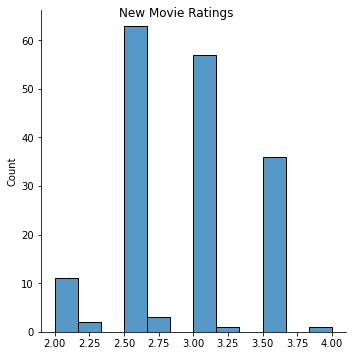

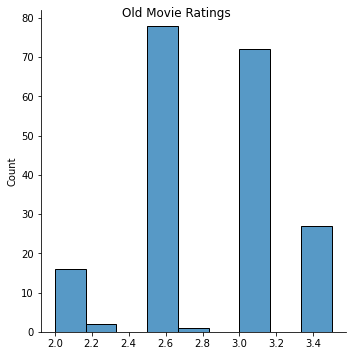

In [48]:
### PROBLEM TWO ###
# Initialize movie titles into a list 
movie_titles_list = movie_titles.columns

# Loop through all movie titles, extract title and year
movie_title_year_dict = {}
movie_title_years = []
for title in movie_titles_list:
    year = title.split('(')[-1].split(')')[0]

    try:
        year = int(year)
        movie_title_years.append(year)
        movie_title_year_dict[title] = int(year)
    except:
        continue
    
# Save median movie year
movie_title_years = np.array(movie_title_years)
median_movie_year = np.median(movie_title_years)

# Get titles above and below median year
new_movie_titles = [k for k in movie_title_year_dict if movie_title_year_dict[k] > median_movie_year]
old_movie_titles = [k for k in movie_title_year_dict if movie_title_year_dict[k] < median_movie_year]

# Subset data to new and old movies
new_movies = movie_titles.loc[:, (movie_titles.columns.isin(new_movie_titles))]
old_movies = movie_titles.loc[:, (movie_titles.columns.isin(old_movie_titles))]

# Get non-nan ratings data for both subsets
new_movie_ratings = new_movies.median().values
old_movie_ratings = old_movies.median().values

# Plot ratings
new_movie_plot = sns.displot(new_movie_ratings, legend = False)
old_movie_plot = sns.displot(old_movie_ratings, legend = False)

new_movie_plot.fig.suptitle("New Movie Ratings")
old_movie_plot.fig.suptitle("Old Movie Ratings")

t, p = stats.mannwhitneyu(new_movie_ratings, old_movie_ratings, alternative = 'two-sided')
print('Mann Whitney U :', p)

## Problem Three: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

#### The Short Answer
No, it does not appear that enjoyment of Shrek (2001) is gendered. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I first subsetted my full dataset to only include ratings for the movie Shrek (2001). I then split the dataset into ratings from males and ratings from females using the gender column. Ratings from users with a gender defined as neither male nor female were not included in my data. 

Next, I dropped null values element-wise for both datasets in order to avoid misleading results from my significance testing. 

#### Test Used: Mann Whitney U Test
I used a two-tailed Mann Whitney U Test in order to compare the ratings of Shrek from males to the ratings of Shrek from females. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from males and ratings from females 
- Alternative Hypothesis: There is some distinction between ratings from males and ratings from females

#### Result
The p-value generated from my data was 0.050536625925559006, which is higher than the specified threshhold of 0.005. Therefore, we fail to reject the null hypothesis that there is no difference between ratings from males and ratings from females. 

In [49]:
### PROBLEM THREE ###
## TEST: KS Test + MWU
# Initialize Shrek Data
shrek_data = movie_data[['Shrek (2001)', 'Gender identity (1 = female; 2 = male; 3 = self-described)']]
shrek_data.columns = ['Rating', 'Gender']
# Note: (1 = female; 2 = male; 3 = self-described)

# Subset data on males and females
shrek_males = shrek_data[shrek_data.Gender == 2]
shrek_females = shrek_data[shrek_data.Gender == 1]

# Drop Null Values
shrek_females = shrek_females.dropna()
shrek_males = shrek_males.dropna()

# Run test
t, p = stats.mannwhitneyu(shrek_males['Rating'], shrek_females['Rating'], alternative = 'two-sided')
print('Mann Whitney U :', p)

Mann Whitney U : 0.050536625925559006


## Problem Four: What proportion of movies are rated differently by male and female viewers??

#### The Short Answer
12.5% of movies are rated differently by male and female viewers

#### Data Pre-Processing
The data pre-processing was a replication of the data pre-processing done in problem three for Shrek (2001). The distinction for problem four is that I functionalized the work done in problem three such that I could run the same analysis I ran on Shrek (2001) for any movie. 

I looped through each movie in my dataset and ran the gendered analysis to answer the stated question. 

#### Test Used: Mann Whitney U Test
I used a two-tailed Mann Whitney U Test in order to compare the ratings of a movie from males to the ratings of that same movie from females. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from males and ratings from females 
- Alternative Hypothesis: There is some distinction between ratings from males and ratings from females

#### Result
In 12.5% of movies, my significance test yielded a p-value that was below the pre-specified threshhold of 0.005. In these cases, I rejected the null hypothesis that there was no different in male ratings and female ratings for the given movie. In other words, in these cases I concluded that the movie's enjoyment was probably gendered. 

In [50]:
### PROBLEM FOUR ###
## TEST: KS Test
# Functionalize Problem Three
def male_female_difference(movieName):
    specified_movie_data = movie_data[[movieName, 'Gender identity (1 = female; 2 = male; 3 = self-described)']]
    specified_movie_data.columns = ['Rating', 'Gender']

    specified_movie_males = specified_movie_data[specified_movie_data.Gender == 2]
    specified_movie_females = specified_movie_data[specified_movie_data.Gender == 1]

    ## MWU P
    specified_movie_females = specified_movie_females.dropna()
    specified_movie_males = specified_movie_males.dropna()

    ## KS P
    t, p1 = stats.ks_2samp(specified_movie_males['Rating'], specified_movie_females['Rating'], alternative = 'two-sided')

    t, p2 = stats.mannwhitneyu(specified_movie_males['Rating'], specified_movie_females['Rating'], alternative = 'two-sided')

    if p1 <= 0.005 or p2 <= 0.005:
        return 1
    else:
        return 0

significant_gender_results = 0
for specified_movie_title in movie_titles.columns:
    significant_gender_results += male_female_difference(specified_movie_title)


print(significant_gender_results / len(movie_titles.columns))

0.125


## Problem Five:  Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

#### The Short Answer
No, it does not appear that enjoyment of The Lion King (1994) is conditioned on having siblings vs being an only child. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I first subsetted my full dataset to only include ratings for the movie The Lion King (1994). I then split the dataset into ratings from only-children and ratings from viewers with siblings using the sibling-question column. Ratings from users who did not indicate either an only-child or sibling status were not used. 

Next, I dropped null values element-wise for both datasets in order to avoid misleading results from my significance testing. 

#### Test Used: Mann Whitney U Test
I used a one-tailed Mann Whitney U Test in order to compare the ratings of The Lion King from only-children to the ratings of The Lion King from siblings. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from only-children and ratings from siblings 
- Alternative Hypothesis: There is some distinction between ratings from only-children and ratings from siblings

#### Result
The p-value generated from my data was 0.978419092554931, which is higher than the specified threshhold of 0.005. Therefore, we fail to reject the null hypothesis that there is no difference between ratings from males and ratings from females. 

In [51]:
### PROBLEM FIVE ###
## TEST: Mann Whitney U
# Initialize Lion King Data 
lion_data = movie_data[['The Lion King (1994)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
lion_data.columns = ['Rating', 'Only_Child']

# Drop Nulls
lion_only = lion_data[lion_data.Only_Child == 1].dropna()
lion_sibling = lion_data[lion_data.Only_Child == 0].dropna()

t, p = stats.mannwhitneyu(lion_only['Rating'], lion_sibling['Rating'], alternative = 'greater')
p

0.978419092554931

## Problem Six: What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings?

#### The Short Answer
1.75% of movies are impacted by an "only child effect"

#### Data Pre-Processing
The data pre-processing was a replication of the data pre-processing done in problem five for The Lion King (1994). The distinction for problem six is that I functionalized the work done in problem five such that I could run the same analysis I ran on The Lion King (1994) for any movie. 

I looped through each movie in my dataset and ran the only child effect analysis to answer the stated question. 

#### Test Used: Mann Whitney U Test
I used a two-tailed Mann Whitney U Test in order to compare the ratings of a movie from only-children to the ratings of that same movie from siblings. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from only-children and ratings from siblings 
- Alternative Hypothesis: There is some distinction between ratings from only-children and ratings from siblings

#### Result
In 1.75% of movies, my significance test yielded a p-value that was below the pre-specified threshhold of 0.005. In these cases, I rejected the null hypothesis that there was no difference in only-children ratings and sibling ratings for the given movie. In other words, in these cases I concluded that the movie's enjoyment was probably impacted by an "only child effect." 

In [52]:
### PROBLEM SIX ###
# Functionalize Problem 5
def only_child_effect(specified_movie_name):
    spec_movie_data = movie_data[[specified_movie_name, 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
    spec_movie_data.columns = ['Rating', 'Only_Child']

    # Note: Only Child? (1: Yes; 0: No; -1: Did not respond)

    spec_only = spec_movie_data[spec_movie_data.Only_Child == 1].dropna()
    spec_sibling = spec_movie_data[spec_movie_data.Only_Child == 0].dropna()

    t, p = stats.mannwhitneyu(spec_only['Rating'], spec_sibling['Rating'], alternative = 'two-sided')

    if p <= 0.005:
        return 1
    else:
        return 0

only_child_results = 0
for specified_movie_title in movie_titles.columns:
    only_child_results += only_child_effect(specified_movie_title)

print(only_child_results / len(movie_titles.columns))

0.0175


## Problem Seven:  Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

#### The Short Answer
No, it does not appear that enjoyment of The Wolf of Wall Street (2013) is conditioned on social preferences for movie-watching. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I first subsetted my full dataset to only include ratings for the movie The Wolf of Wall Street (2013). I then split the dataset into ratings from social viewers and ratings from non-social viewers using the "Movies are best enjoyed alone" question column. Ratings from users who did not indicate a clear preference were not used. 

Next, I dropped null values element-wise for both datasets in order to avoid misleading results from my significance testing. 

#### Test Used: Mann Whitney U Test
I used a one-tailed Mann Whitney U Test in order to compare the ratings of The Wolf of Wall Street from social viewrs to the ratings of The Wolf of Wall Street from non-social viewers. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from social viewers and ratings from non-social viewers 
- Alternative Hypothesis: There is some distinction between ratings from social viewers and ratings from non-social viewers

#### Result
The p-value generated from my data was 0.9436657996253056, which is higher than the specified threshhold of 0.005. Therefore, we fail to reject the null hypothesis that there is no difference between ratings from social viewers and ratings from non-social viewers.

In [53]:
### PROBLEM SEVEN ### 

# Initialize Wolf of Wall Street Data 
wolf_data = movie_data[['The Wolf of Wall Street (2013)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
wolf_data.columns = ['Rating', 'Loner']

# Note: Loner? (1: Yes; 0: No; -1: Did not respond)
wolf_loner = wolf_data[wolf_data.Loner == 1].dropna()
wolf_social = wolf_data[wolf_data.Loner == 0].dropna()

t, p = stats.mannwhitneyu(wolf_social['Rating'], wolf_loner['Rating'], alternative = 'greater')
p

0.9436657996253056

## Problem Eight: What proportion of movies exhibit such a “social watching” effect?

#### The Short Answer
2.5% of movies are impacted by a "social watching effect"

#### Data Pre-Processing
The data pre-processing was a replication of the data pre-processing done in problem seven for The Wolf of Wall Street (2013). The distinction for problem eight is that I functionalized the work done in problem seven such that I could run the same analysis I ran on The Wolf of Wall Street (1994) for any movie. 

I looped through each movie in my dataset and ran the social watching effect analysis to answer the stated question. 

#### Test Used: Mann Whitney U Test
I used a two-tailed Mann Whitney U Test in order to compare the ratings of a movie from social viewers to the ratings of that same movie from non-social viewers. I used the following structure: 

- Null Hypothesis: There is no difference between ratings from social viewers and ratings from non-social viewers 
- Alternative Hypothesis: There is some distinction between ratings from social viewers and ratings from non-social viewers

#### Result
In 2.5% of movies, my significance test yielded a p-value that was below the pre-specified threshhold of 0.005. In these cases, I rejected the null hypothesis that there was no difference between ratings from social viewers and ratings from non-social viewers for the given movie. In other words, in these cases I concluded that the movie's enjoyment was probably impacted by a "social watching effect." 

In [54]:
### PROBLEM EIGHT ###

# Functionalize Problem 7
def social_effect(specified_movie_name):
    spec_movie_data = movie_data[[specified_movie_name, 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
    spec_movie_data.columns = ['Rating', 'Loner']

    # Note: Loner? (1: Yes; 0: No; -1: Did not respond)

    spec_loner = spec_movie_data[spec_movie_data.Loner == 1].dropna()
    spec_social = spec_movie_data[spec_movie_data.Loner == 0].dropna()

    t, p = stats.mannwhitneyu(spec_loner['Rating'], spec_social['Rating'], alternative = 'two-sided')

    if p <= 0.005:
        return 1
    else:
        return 0

social_results = 0
for specified_movie_title in movie_titles.columns:
    social_results += social_effect(specified_movie_title)

print(social_results / len(movie_titles.columns))

0.025


## Problem Nine:  Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

#### The Short Answer
Yes, it does appear that the ratings distributions are different for these two movies. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I first subsetted my full dataset into two subsets that only included ratings for the movies of concern: Home Alone (1990) and Finding Nemo (2003).

Next, I dropped null values element-wise for both datasets in order to avoid misleading results from my significance testing. 

#### Test Used: Kolmogorov-Smirnov Test
I used a two-tailed Kolmogorov-Smirnov Test in order to compare the ratings distribution of Home Alone (1990) to the ratings distribution of Finding Nemo (2003). I used the following structure: 

- Null Hypothesis: There is no difference between rating distribution of Home Alone and that of Finding Nemo
- Alternative Hypothesis: There is some distinction between ratings distribution of Home Alone and that of Finding Nemo

#### Result
The p-value generated from my data was 6.379381467525036e-10, which is lower than the specified threshhold of 0.005. Therefore, we reject the null hypothesis that there is no difference between ratings from social viewers and ratings from non-social viewers. In other words, we support the claim that the two movies are rated with different distributions. 

In [55]:
### PROBLEM NINE ###
## TEST: KS Test
t, p = stats.ks_2samp(movie_data['Home Alone (1990)'].dropna(), movie_data['Finding Nemo (2003)'].dropna(), alternative = 'two-sided')
p

6.379381467525036e-10

## Problem Ten:  There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers??

#### The Short Answer
Two franchises (Harry Potter and Pirates of the Caribbean) exhibited signs of inconsistency, as experienced by viewers. 

The other franchises did not exhibit statistically significant signs of inconsistency. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I first found, for each franchise, all of the movies that were part of the franchise. Then, again for each franchise, I was able to subset my full dataframe down to only the movies part of the particular franchise.

Next, I dropped null values row-wise for both datasets in order to avoid misleading results from my significance testing. This is a departure from the previous problems, where I dropped null values element-wise. My reasoning is that if somoeone watched only a subset of a movie franchise's movies, it could be indicative of their enjoyment. For example, someone who has watched all movies of a franchise might enjoy the franchise more than someone who only watched the first movie and chose not to watch and subsequent movies. So, I am only considering people who have seen all movies within a given franchise. 

#### Test Used: Kruskal-Wallis Test
I used a Kruskal-Wallis Test in order to compare the ratings between multiple movies within a given franchise. I used the following structure, for each franchise: 

- Null Hypothesis: There is no difference between ratings of all the movies within the franchise
- Alternative Hypothesis: There is some distinction between ratings of movies within the franchise

#### Result
The p-value generated from my data was dependent on the franchise, but is outputted in the following cells. I failed to reject the null hypothesis for the following franchises: Harry Potter and Pirates of the Caribbean. For the remaining franchises, I rejected the null hypothesis. 

In [56]:
### PROBLEM TEN ###

## Get the movies in each franchise
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 
            'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']

for franchise in franchises: 
    movies = []
    for movie_title in list(movie_titles.columns):
        if franchise in movie_title:
            movies.append(movie_title)
    #print(franchise)
    #print(movies)
    #print('----------')

In [57]:
# Star Wars
star_wars = movie_titles[['Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode 1 - The Phantom Menace (1999)', 'Star Wars: Episode VII - The Force Awakens (2015)', 'Star Wars: Episode VI - The Return of the Jedi (1983)']].dropna()
h, p = stats.kruskal(star_wars['Star Wars: Episode IV - A New Hope (1977)'], 
                    star_wars['Star Wars: Episode II - Attack of the Clones (2002)'], 
                    star_wars['Star Wars: Episode V - The Empire Strikes Back (1980)'], 
                    star_wars['Star Wars: Episode 1 - The Phantom Menace (1999)'], 
                    star_wars['Star Wars: Episode VII - The Force Awakens (2015)'], 
                    star_wars['Star Wars: Episode VI - The Return of the Jedi (1983)'],
                    nan_policy = 'omit')

print('Star Wars', p)

# Harry Potter
harry_potter = movie_titles[["Harry Potter and the Sorcerer's Stone (2001)", 'Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Harry Potter and the Goblet of Fire (2005)', 'Harry Potter and the Chamber of Secrets (2002)']].dropna()
h, p = stats.kruskal(harry_potter["Harry Potter and the Sorcerer's Stone (2001)"], 
                    harry_potter['Harry Potter and the Deathly Hallows: Part 2 (2011)'], 
                    harry_potter['Harry Potter and the Goblet of Fire (2005)'], 
                    harry_potter['Harry Potter and the Chamber of Secrets (2002)'], 
                    nan_policy = 'omit')

print('Harry Potter', p)


# The Matrix
matrix = movie_titles[['The Matrix Revolutions (2003)', 'The Matrix Reloaded (2003)', 'The Matrix (1999)']].dropna()
h, p = stats.kruskal(matrix["The Matrix Revolutions (2003)"], 
                    matrix['The Matrix Reloaded (2003)'], 
                    matrix['The Matrix (1999)'], 
                    nan_policy = 'omit')

print('The Matrix', p)

# Indiana Jones
indiana_jones = movie_titles[['Indiana Jones and the Last Crusade (1989)', 'Indiana Jones and the Temple of Doom (1984)', 'Indiana Jones and the Raiders of the Lost Ark (1981)', 'Indiana Jones and the Kingdom of the Crystal Skull (2008)']].dropna()
h, p = stats.kruskal(indiana_jones["Indiana Jones and the Last Crusade (1989)"], 
                    indiana_jones['Indiana Jones and the Temple of Doom (1984)'], 
                    indiana_jones['Indiana Jones and the Raiders of the Lost Ark (1981)'], 
                    indiana_jones['Indiana Jones and the Kingdom of the Crystal Skull (2008)'],
                    nan_policy = 'omit')

print('Indiana Jones', p)


# Jurassic Park
j_park = movie_titles[['The Lost World: Jurassic Park (1997)', 'Jurassic Park III (2001)', 'Jurassic Park (1993)']].dropna()
h, p = stats.kruskal(j_park["The Lost World: Jurassic Park (1997)"], 
                    j_park['Jurassic Park III (2001)'], 
                    j_park['Jurassic Park (1993)'], 
                    nan_policy = 'omit')

print('Jurassic Park', p)


# Pirates
pirates = movie_titles[["Pirates of the Caribbean: Dead Man's Chest (2006)", "Pirates of the Caribbean: At World's End (2007)", 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)']].dropna()
h, p = stats.kruskal(pirates["Pirates of the Caribbean: Dead Man's Chest (2006)"], 
                    pirates["Pirates of the Caribbean: At World's End (2007)"], 
                    pirates['Pirates of the Caribbean: The Curse of the Black Pearl (2003)'],
                    nan_policy = 'omit')

print('Pirates', p)


# Toy Story
toy_story = movie_titles[['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story (1995)']].dropna()
h, p = stats.kruskal(toy_story["Toy Story 2 (1999)"], 
                    toy_story['Toy Story 3 (2010)'], 
                    toy_story['Toy Story (1995)'],
                    nan_policy = 'omit')

print('Toy Story', p)


# Batman
batman = movie_titles[['Batman & Robin (1997)', 'Batman (1989)', 'Batman: The Dark Knight (2008)']].dropna()
h, p = stats.kruskal(batman["Batman & Robin (1997)"], 
                    batman['Batman (1989)'], 
                    batman['Batman: The Dark Knight (2008)'],
                    nan_policy = 'omit')

print('Batman', p)

Star Wars 6.940162236984522e-40
Harry Potter 0.11790622831256074
The Matrix 1.7537323830838066e-09
Indiana Jones 1.020118354785894e-11
Jurassic Park 1.8492328391686058e-11
Pirates 0.035792727694248905
Toy Story 7.902234665149812e-06
Batman 4.1380499020034183e-19


## Extra Credit: Do Early Adopters to the Harry Potter Movie Franchise Rate "The Goblet of Fire" Higher than Late Joiners?

#### Motivation
The Goblet of Fire happens to be my favorite Harry Potter movie! Anecdotally, I have found that people who have not seen Harry Potter from the start seem to miss out on some of the references from the Goblet of Fire. So, I decided to look into this. I defined an "early adopter" of the Harry Potter franchise as people who have seen the first movie, where a lot of the lore is explained and established. I defined "late joiners" as those who skipped the first movie and missed out on a lot of this backstory. I wanted to see if early adopters rate The Goblet of Fire higher than late joiners. 

#### The Short Answer
Yes, it appears that early adopters rate The Goblet of Fire higher than late joiners. 

#### Data Pre-Processing
In order to generate a data set to answer this problem, I used the Harry Potter subset I generated in problem ten. Then, I subset my data into two parts, one subset of people who had not rated the first Harry Potter Movie and another subset of people who had rated the first Harry Potter Movie. 

Next, I dropped null values element-wise for both datasets in order to avoid misleading results from my significance testing. 

#### Test Used: Mann-Whitney U Test
I used a one-tailed Mann Whitney U Test in order to compare the ratings of The Goblet of Fire by early adopters and late joiners. 

- Null Hypothesis: There is no difference between ratings of The Goblet of Fire by early adopters and late joiners
- Alternative Hypothesis: There is some distinction between ratings of The Goblet of Fire by early adopters and late joiners

#### Result
The p-value generated from my data was 0.0012670457680095122, which falls below the pre-specified threshhold of 0.005. So, I reject the null hypothesis that there is is no difference between ratings of The Goblet of Fire by early adopters and late joiners. 

In [62]:
### Extra Credit Problem ###

# Harry Potter - Full Data 
harry_potter_full = movie_titles[["Harry Potter and the Sorcerer's Stone (2001)", 'Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Harry Potter and the Goblet of Fire (2005)', 'Harry Potter and the Chamber of Secrets (2002)']]

# Subset data
harry_potter_late_start = harry_potter_full[(harry_potter_full["Harry Potter and the Sorcerer's Stone (2001)"].isna())]
harry_potter_non_late_start = harry_potter_full[(harry_potter_full["Harry Potter and the Sorcerer's Stone (2001)"].isna() == False)]

t, p = stats.mannwhitneyu(harry_potter_non_late_start['Harry Potter and the Goblet of Fire (2005)'].dropna(),harry_potter_late_start['Harry Potter and the Goblet of Fire (2005)'].dropna(), alternative = 'greater')
p

0.0012670457680095122